# Sentiment Analysis - EDA and Feature Extraction
# This notebook performs exploratory data analysis and feature extraction


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud
import warnings

warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# ============================================================
# 1. LOAD CLEANED DATA
# ============================================================

# Load the cleaned dataset
df = pd.read_csv('../data/cleaned_data.csv')

print(f"Dataset Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

df.head()

Dataset Shape: (692500, 19)
Columns: ['PERIODO_ACADEMICO', 'E_PRGM_ACADEMICO', 'E_PRGM_DEPARTAMENTO', 'E_VALORMATRICULAUNIVERSIDAD', 'E_HORASSEMANATRABAJA', 'F_ESTRATOVIVIENDA', 'F_TIENEINTERNET', 'F_EDUCACIONPADRE', 'F_TIENELAVADORA', 'F_TIENEAUTOMOVIL', 'E_PRIVADO_LIBERTAD', 'E_PAGOMATRICULAPROPIO', 'F_TIENECOMPUTADOR', 'F_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL', 'INDICADOR_1', 'INDICADOR_2', 'INDICADOR_3', 'INDICADOR_4']


,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,20212,300,4,5.0,1,3.0,1,5.0,1,1,0.0,0,1,9.0,2,0.322,0.208,0.310,0.267
1,20212,249,3,3.0,0,3.0,0,6.0,1,0,0.0,0,1,5.0,0,0.311,0.215,0.292,0.264
2,20203,819,4,3.0,4,3.0,1,4.0,1,0,0.0,0,0,4.0,0,0.297,0.214,0.305,0.264
3,20195,14,26,4.0,0,4.0,1,4.0,1,0,0.0,0,1,4.0,3,0.485,0.172,0.252,0.190
4,20212,907,1,3.0,3,3.0,1,2.0,1,1,0.0,0,1,2.0,1,0.316,0.232,0.285,0.294


In [3]:
# ============================================================
# 2. BASIC STATISTICS
# ============================================================

print("\n" + "="*60)
print("DATASET OVERVIEW")
print("="*60)

print("\nDataset Info:")
print(df.info())

print("\nNumerical Statistics:")
print(df.describe())

print("\nCategorical Statistics:")
print(df.describe())


DATASET OVERVIEW

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   PERIODO_ACADEMICO            692500 non-null  int64  
 1   E_PRGM_ACADEMICO             692500 non-null  int64  
 2   E_PRGM_DEPARTAMENTO          692500 non-null  int64  
 3   E_VALORMATRICULAUNIVERSIDAD  692500 non-null  float64
 4   E_HORASSEMANATRABAJA         692500 non-null  int64  
 5   F_ESTRATOVIVIENDA            692500 non-null  float64
 6   F_TIENEINTERNET              692500 non-null  int64  
 7   F_EDUCACIONPADRE             692500 non-null  float64
 8   F_TIENELAVADORA              692500 non-null  int64  
 9   F_TIENEAUTOMOVIL             692500 non-null  int64  
 10  E_PRIVADO_LIBERTAD           692466 non-null  float64
 11  E_PAGOMATRICULAPROPIO        692500 non-null  int64  
 12  F_TIENECOMPUTADOR        

Numerical Columns: ['PERIODO_ACADEMICO', 'E_PRGM_ACADEMICO', 'E_PRGM_DEPARTAMENTO', 'E_VALORMATRICULAUNIVERSIDAD', 'E_HORASSEMANATRABAJA', 'F_ESTRATOVIVIENDA', 'F_TIENEINTERNET', 'F_EDUCACIONPADRE', 'F_TIENELAVADORA', 'F_TIENEAUTOMOVIL', 'E_PRIVADO_LIBERTAD', 'E_PAGOMATRICULAPROPIO', 'F_TIENECOMPUTADOR', 'F_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL', 'INDICADOR_1', 'INDICADOR_2', 'INDICADOR_3', 'INDICADOR_4']

CORRELATION ANALYSIS


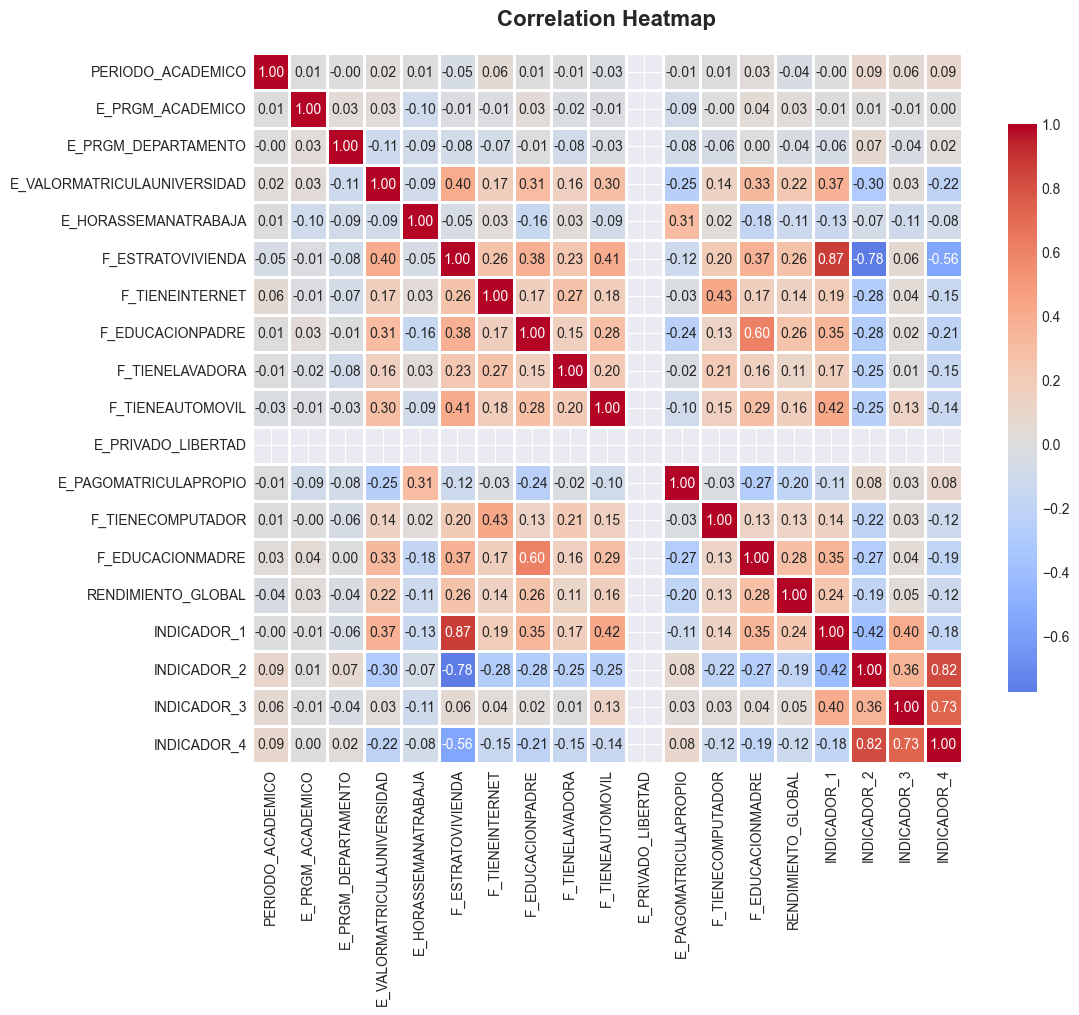


Highly Correlated Features (|correlation| > 0.7):
           Feature 1    Feature 2  Correlation
0  F_ESTRATOVIVIENDA  INDICADOR_1     0.874330
1  F_ESTRATOVIVIENDA  INDICADOR_2    -0.775411
2        INDICADOR_2  INDICADOR_4     0.821443
3        INDICADOR_3  INDICADOR_4     0.726692


In [4]:
# ============================================================
# 4. CORRELATION ANALYSIS
# ============================================================
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Numerical Columns:", numerical_cols)

if len(numerical_cols) > 1:
    print("\n" + "="*60)
    print("CORRELATION ANALYSIS")
    print("="*60)
    
    # Calculate correlation matrix
    correlation_matrix = df[numerical_cols].corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig('../notebooks/correlation_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Find highly correlated features
    high_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > 0.7:
                high_corr.append({
                    'Feature 1': correlation_matrix.columns[i],
                    'Feature 2': correlation_matrix.columns[j],
                    'Correlation': correlation_matrix.iloc[i, j]
                })
    
    if high_corr:
        print("\nHighly Correlated Features (|correlation| > 0.7):")
        print(pd.DataFrame(high_corr))

In [5]:
# ============================================================
# 5. CATEGORICAL ANALYSIS
# ============================================================

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

if categorical_cols:
    print("\n" + "="*60)
    print("CATEGORICAL FEATURES ANALYSIS")
    print("="*60)
    
    for col in categorical_cols[:4]:  # Analyze first 4 categorical columns
        print(f"\n{col} Value Counts:")
        value_counts = df[col].value_counts().head(10)
        print(value_counts)
        
        # Plot bar chart
        plt.figure(figsize=(10, 6))
        value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig(f'../notebooks/{col}_distribution.png', dpi=300, bbox_inches='tight')
        plt.show()

In [6]:
# ============================================================
# 6. TEXT ANALYSIS (if text columns exist)
# ============================================================

# Function to identify text columns
def identify_text_columns(df):
    text_cols = []
    for col in df.columns:
        if df[col].dtype == 'object':
            avg_length = df[col].astype(str).str.len().mean()
            if avg_length > 20:  # Likely a text column
                text_cols.append(col)
    return text_cols

text_columns = identify_text_columns(df)

if text_columns:
    print("\n" + "="*60)
    print("TEXT ANALYSIS")
    print("="*60)
    print(f"Identified text columns: {text_columns}")
    
    for text_col in text_columns[:2]:  # Analyze first 2 text columns
        print(f"\n--- Analyzing: {text_col} ---")
        
        # Text length analysis
        df[f'{text_col}_length'] = df[text_col].astype(str).str.len()
        df[f'{text_col}_word_count'] = df[text_col].astype(str).str.split().str.len()
        
        # Plot text length distribution
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        axes[0].hist(df[f'{text_col}_length'].dropna(), bins=50, 
                     color='lightblue', edgecolor='black', alpha=0.7)
        axes[0].set_title(f'Text Length Distribution - {text_col}')
        axes[0].set_xlabel('Character Count')
        axes[0].set_ylabel('Frequency')
        
        axes[1].hist(df[f'{text_col}_word_count'].dropna(), bins=50,
                     color='lightgreen', edgecolor='black', alpha=0.7)
        axes[1].set_title(f'Word Count Distribution - {text_col}')
        axes[1].set_xlabel('Word Count')
        axes[1].set_ylabel('Frequency')
        
        plt.tight_layout()
        plt.savefig(f'../notebooks/{text_col}_text_stats.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"\nText Length Statistics:")
        print(df[f'{text_col}_length'].describe())
        
        print(f"\nWord Count Statistics:")
        print(df[f'{text_col}_word_count'].describe())
        
        # Word Cloud
        try:
            text_data = ' '.join(df[text_col].dropna().astype(str))
            
            wordcloud = WordCloud(width=800, height=400, 
                                 background_color='white',
                                 max_words=100).generate(text_data)
            
            plt.figure(figsize=(12, 6))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'Word Cloud - {text_col}', fontsize=16, fontweight='bold')
            plt.tight_layout()
            plt.savefig(f'../notebooks/{text_col}_wordcloud.png', dpi=300, bbox_inches='tight')
            plt.show()
        except Exception as e:
            print(f"Could not generate word cloud: {e}")


In [7]:
# ============================================================
# 7. FEATURE EXTRACTION - TF-IDF
# ============================================================

if text_columns:
    print("\n" + "="*60)
    print("FEATURE EXTRACTION - TF-IDF")
    print("="*60)
    
    # Use the first text column for demonstration
    text_col = text_columns[0]
    
    # Create TF-IDF features
    tfidf = TfidfVectorizer(max_features=100, 
                            ngram_range=(1, 2),
                            min_df=2,
                            max_df=0.8,
                            stop_words='english')
    
    tfidf_features = tfidf.fit_transform(df[text_col].fillna(''))
    
    # Get feature names
    feature_names = tfidf.get_feature_names_out()
    
    # Convert to DataFrame
    tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=feature_names)
    
    print(f"\nTF-IDF Features Shape: {tfidf_df.shape}")
    print("\nTop 20 TF-IDF Features:")
    
    # Calculate average TF-IDF score for each feature
    avg_tfidf = tfidf_df.mean().sort_values(ascending=False).head(20)
    print(avg_tfidf)
    
    # Visualize top features
    plt.figure(figsize=(12, 6))
    avg_tfidf.plot(kind='barh', color='coral', edgecolor='black')
    plt.title('Top 20 TF-IDF Features', fontsize=14, fontweight='bold')
    plt.xlabel('Average TF-IDF Score')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.savefig('../notebooks/top_tfidf_features.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Save TF-IDF features
    tfidf_output = pd.concat([df.reset_index(drop=True), tfidf_df], axis=1)
    tfidf_output.to_csv('../data/data_with_tfidf_features.csv', index=False)
    print("\n✅ TF-IDF features saved to: ../data/data_with_tfidf_features.csv")


In [8]:
# ============================================================
# 8. FEATURE EXTRACTION - COUNT VECTORIZER
# ============================================================

if text_columns:
    print("\n" + "="*60)
    print("FEATURE EXTRACTION - COUNT VECTORIZER")
    print("="*60)
    
    # Create Count Vectorizer features
    count_vec = CountVectorizer(max_features=50,
                            ngram_range=(1, 2),
                            min_df=2,
                            max_df=0.8,
                            stop_words='english')
    
    count_features = count_vec.fit_transform(df[text_col].fillna(''))
    
    # Get feature names
    count_feature_names = count_vec.get_feature_names_out()
    
    # Convert to DataFrame
    count_df = pd.DataFrame(count_features.toarray(), columns=count_feature_names)
    
    print(f"\nCount Features Shape: {count_df.shape}")
    
    # Calculate total counts for each feature
    total_counts = count_df.sum().sort_values(ascending=False).head(20)
    print("\nTop 20 Most Frequent Terms:")
    print(total_counts)
    
    # Visualize
    plt.figure(figsize=(12, 6))
    total_counts.plot(kind='barh', color='lightblue', edgecolor='black')
    plt.title('Top 20 Most Frequent Terms', fontsize=14, fontweight='bold')
    plt.xlabel('Frequency')
    plt.ylabel('Term')
    plt.tight_layout()
    plt.savefig('../notebooks/top_count_features.png', dpi=300, bbox_inches='tight')
    plt.show()



TIME SERIES ANALYSIS
Analyzing time column: PERIODO_ACADEMICO


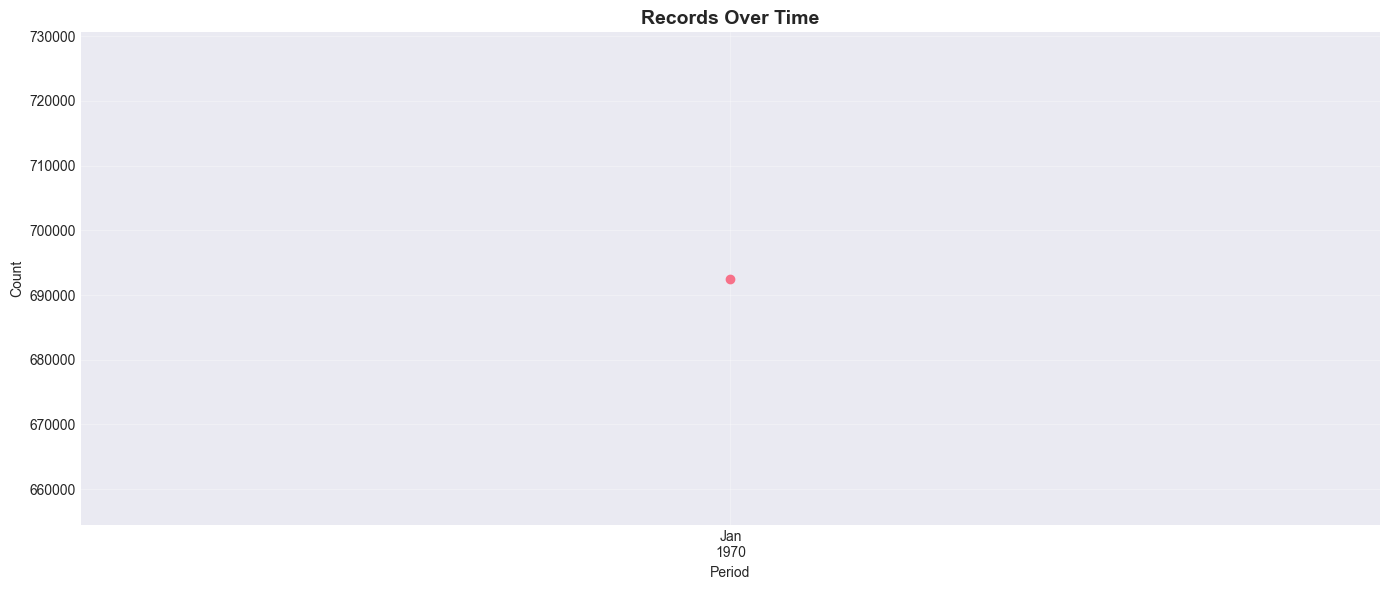

In [9]:
# ============================================================
# 9. TIME SERIES ANALYSIS (if date columns exist)
# ============================================================

# Check for date/period columns
date_cols = [col for col in df.columns if 'periodo' in col.lower() or 'date' in col.lower()]

if date_cols:
    print("\n" + "="*60)
    print("TIME SERIES ANALYSIS")
    print("="*60)
    
    date_col = date_cols[0]
    print(f"Analyzing time column: {date_col}")
    
    # Convert to datetime if needed
    try:
        df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    except:
        print(f"Could not convert {date_col} to datetime")
    
    # Group by date and count
    if df[date_col].dtype == 'datetime64[ns]':
        time_counts = df.groupby(df[date_col].dt.to_period('M')).size()
        
        plt.figure(figsize=(14, 6))
        time_counts.plot(kind='line', marker='o', linewidth=2, markersize=6)
        plt.title('Records Over Time', fontsize=14, fontweight='bold')
        plt.xlabel('Period')
        plt.ylabel('Count')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig('../notebooks/time_series.png', dpi=300, bbox_inches='tight')
        plt.show()

In [10]:
# ============================================================
# 10. SUMMARY REPORT
# ============================================================

print("\n" + "="*60)
print("EDA SUMMARY REPORT")
print("="*60)

print(f"\nDataset Shape: {df.shape}")
print(f"Number of Features: {df.shape[1]}")
print(f"Number of Records: {df.shape[0]}")

print(f"\nNumerical Features: {len(numerical_cols)}")
print(f"Categorical Features: {len(categorical_cols)}")
print(f"Text Features: {len(text_columns)}")

print("\nMissing Values:")
missing = df.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("No missing values found!")

print("\n✅ EDA and Feature Extraction completed successfully!")
print("\nGenerated visualizations saved in '../notebooks/' folder:")
print("  - distributions.png")
print("  - correlation_heatmap.png")
print("  - top_tfidf_features.png")
print("  - top_count_features.png")
print("  - wordcloud images")


EDA SUMMARY REPORT

Dataset Shape: (692500, 19)
Number of Features: 19
Number of Records: 692500

Numerical Features: 19
Categorical Features: 0
Text Features: 0

Missing Values:
E_PRIVADO_LIBERTAD    34
dtype: int64

✅ EDA and Feature Extraction completed successfully!

Generated visualizations saved in '../notebooks/' folder:
  - distributions.png
  - correlation_heatmap.png
  - top_tfidf_features.png
  - top_count_features.png
  - wordcloud images
